# **Getting Started with Image Processing with Python.**

Introduction to Python Imaging Library(PIL)

2.1 Exercise - 1:

1. Read and display the image.
• Read the image using the Pillow library and display it.
• You can also use matplotlib to display the image.

In [3]:
from PIL import Image

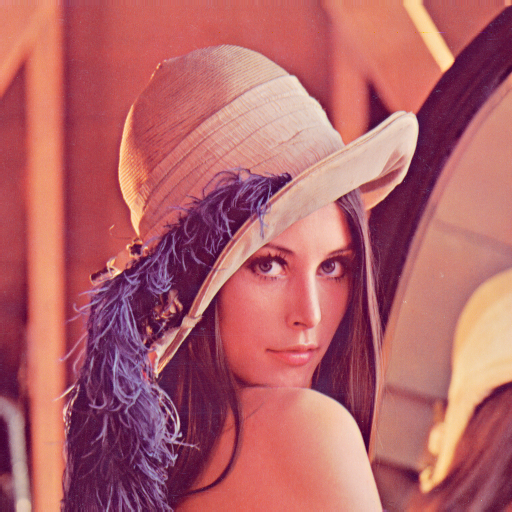

In [ ]:
from PIL import Image # display image in colab
image_colored = Image . open ("/content/Lenna_(test_image).png")
display ( image_colored )

2. Display only the top left corner of 100x100 pixels.
• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.

In [1]:
import numpy as np

array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [179,  79,  86],
        [178,  78,  93],
        [174,  78,  87]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [179,  79,  86],
        [178,  78,  93],
        [174,  78,  87]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [179,  79,  86],
        [178,  78,  93],
        [174,  78,  87]],

       ...,

       [[177,  64,  79],
        [177,  64,  79],
        [163,  58,  74],
        ...,
        [177,  65,  79],
        [172,  68,  79],
        [172,  75,  83]],

       [[169,  63,  79],
        [169,  63,  79],
        [159,  53,  74],
        ...,
        [175,  70,  85],
        [178,  72,  84],
        [178,  63,  75]],

       [[166,  55,  74],
        [166,  55,  74],
        [154,  51,  71],
        ...,
        [178,  65,  78],
        [175,  67,  79],
        [177,  59,  79]]], dtype=uint8)
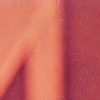

In [ ]:
import numpy as np
# Convert the Pillow image to a NumPy array
image_array_colored = np . array ( image_colored )
pixel_position=image_array_colored[:100,:100]
display(pixel_position)


3. Show the three color channels (R, G, B).
• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}

In [2]:
import matplotlib.pyplot as plt

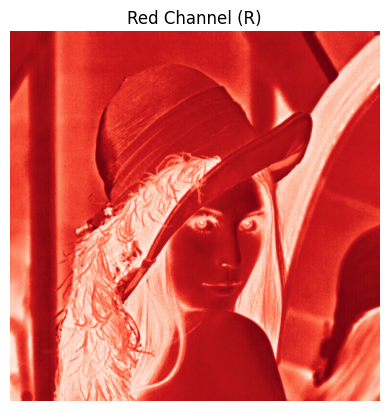

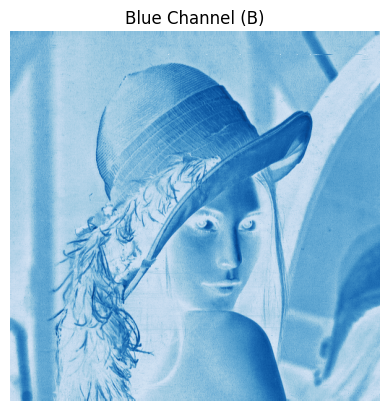

In [ ]:
import matplotlib.pyplot as plt

red_channel = image_array_colored [: , : , 0] # Red channel
green_channel = image_array_colored [: , : , 1] # Greenchannel
blue_channel = image_array_colored [: , : , 2] # Bluechannel

plt.imshow(red_channel, cmap='Reds')
plt.title('Red Channel (R)')
plt.axis('off')
plt.show()
plt.imshow(green_channel,cmap='Greens')
plt.title('Green Channel (G)')
plt.axis('off')
plt.show()
plt.imshow(blue_channel, cmap='Blues')
plt.title('Blue Channel (B)')
plt.axis('off')
plt.show()

4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:
• Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.

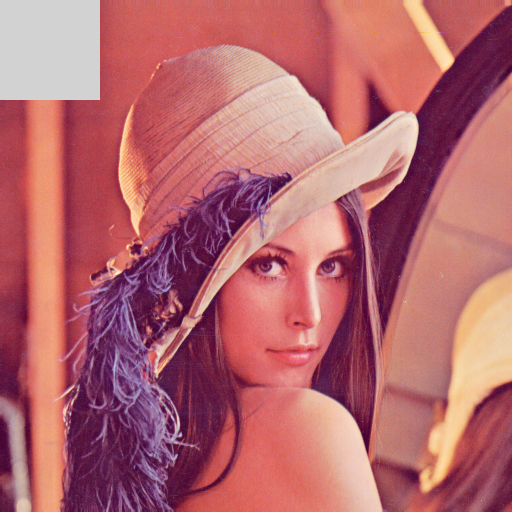

In [ ]:
image_array_colored[:100, :100] = 210
value_change =image_array_colored.astype(np.uint8)
image_pil = Image.fromarray(value_change)
display(image_pil)

2.2 Exercise - 2:

1. Load and display a grayscale image.
• Load a grayscale image using the Pillow library.
• Display the grayscale image using matplotlib.

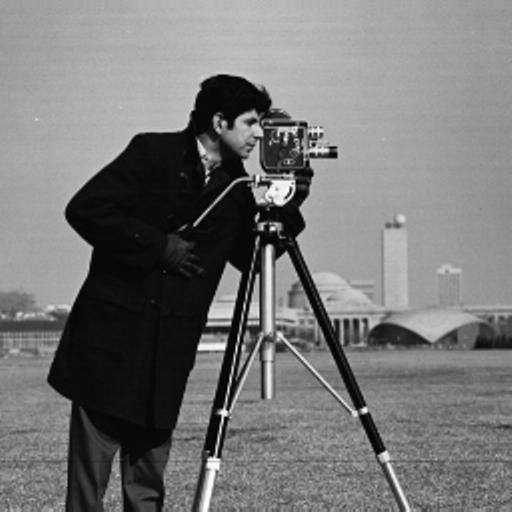

In [ ]:
cameramanImg = Image . open ("/content/cameraman.png")
display (cameramanImg)

2. Extract and display the middle section of the image (150 pixels).
• Extract a 150 pixel section from the center of the image using NumPy array slicing.
• Display this cropped image using matplotlib.

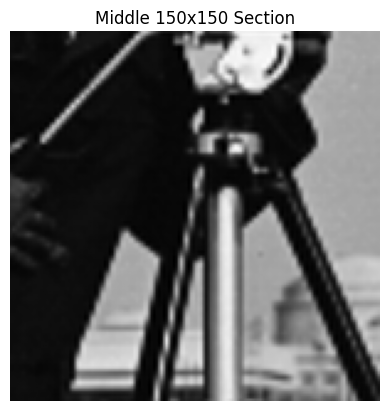

In [ ]:
image_array=np.array(cameramanImg)
height, width = image_array.shape  # _ ignores the color channels (3 for RGB)
# Calculate the center of the image
center_y = height // 2
center_x = width // 2
# Define the size of the middle section (150 pixels)
crop_size = 150
# Extract the middle 150x150 section using NumPy slicing
cropped_image = image_array[ center_y - crop_size//2 : center_y + crop_size//2, center_x - crop_size//2 : center_x + crop_size//2]
# Display the cropped image
plt.imshow(cropped_image, cmap='gray')
plt.title('Middle 150x150 Section')
plt.axis('off')  # Hide axes
plt.show()

3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).
• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
above 100 to 255 (creating a binary image).
• Display the resulting binary image.

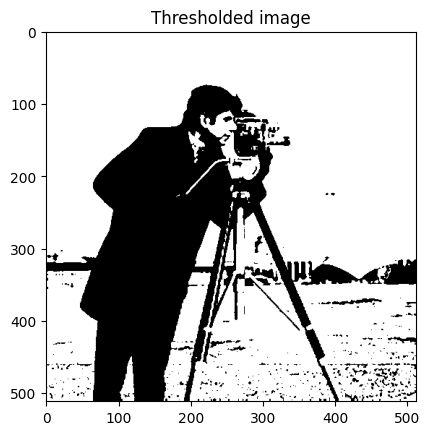

In [ ]:
binary_image = np.where(image_array < 100, 0, 255).astype(np.uint8)
plt.title("Thresholded image")
plt.imshow(binary_image,cmap='gray')

4. Rotate the image 90 degrees clockwise and display the result.
• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating
the image array.
• Display the rotated image using matplotlib.

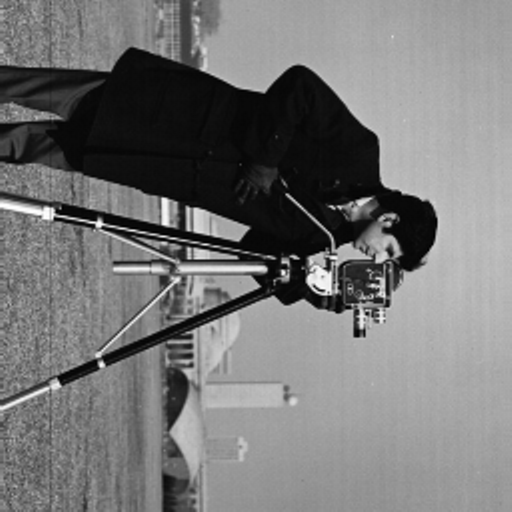

In [ ]:
rotatedImg=cameramanImg.rotate(-90)
display(rotatedImg)

5. Convert the grayscale image to an RGB image.
• Convert the grayscale image into an RGB image where the grayscale values are replicated
across all three channels (R, G, and B).
• Display the converted RGB image using matplotlib.

In [ ]:
# Stack the grayscale image into 3 channels (RGB)
rgb_array = np.stack([image_array] * 3, axis=-1)
converted_img=Image.fromarray(rgb_array)
display(converted_img)

# **Image Compression and Decompression using PCA.**

1. Load and Prepare Data:
• Fetch an image of you choice.{If colour convert to grayscale}
• Center the dataset - Standaridze the Data.
• Calculate the covaraince matrix of the Standaridze data.

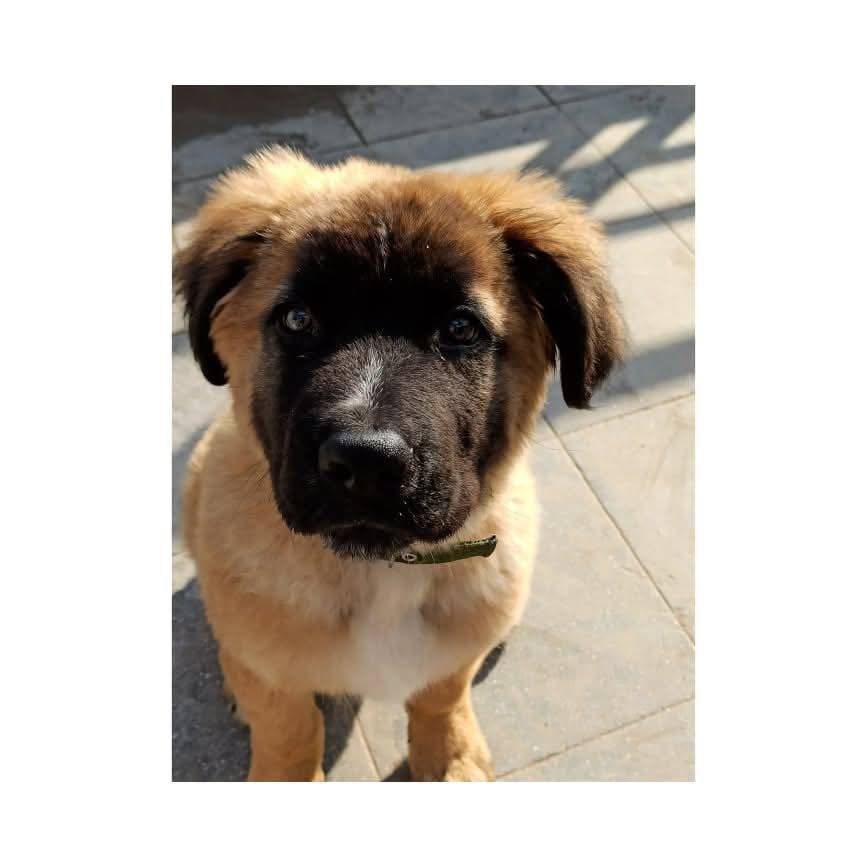

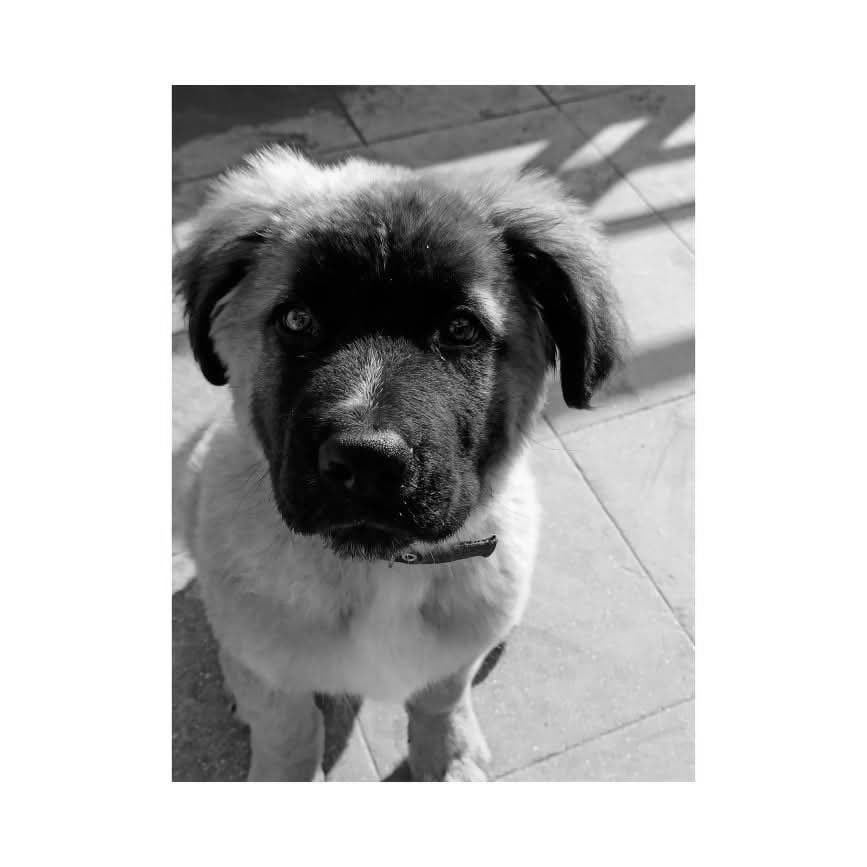

In [4]:
# loading the image
coloredimage=Image.open('/content/dog.jpg')
display(coloredimage)

#converting to grayscale
g_image=coloredimage.convert("L")
display(g_image)

#converting to array for processing
arr=np.array(g_image)
height, width= arr.shape
data = arr . reshape ( height , width )

In [5]:
#centre the image by reducing mean
mean=np.mean(data,axis=0)
centered_data=arr-mean

#compute the covariance
cov_matrix=np.cov(centered_data, rowvar=False)


2. Eigen Decomposition and Identifying Principal Components:
• Compute Eigen Values and Eigen Vectors.
• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to
the highest eigenvalues.
• Identify the Principal Components with the help of cumulative Sum plot.

In [6]:
# Compute eigenvalues and eigenvectors
eigenvalues , eigenvectors = np . linalg . eigh ( cov_matrix )
# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np . argsort ( eigenvalues ) [:: -1]
eigenvalues = eigenvalues [ sorted_indices ]
eigenvectors = eigenvectors [: , sorted_indices ]

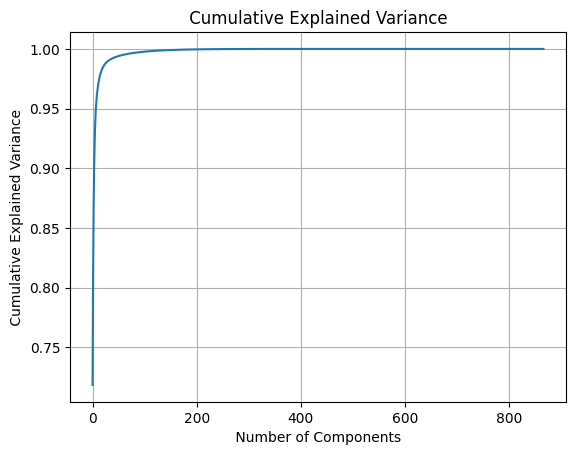

In [7]:
# Plot the explained variance ratio
explained_variance_ratio = eigenvalues / np .sum ( eigenvalues )
plt . plot ( np . cumsum ( explained_variance_ratio ) )
plt . title (" Cumulative Explained Variance ")
plt . xlabel (" Number of Components ")
plt . ylabel (" Cumulative Explained Variance ")
plt . grid ( True )
plt . show ()

3. Reconstruction and Experiment:

• Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
tors(PCs) to obtain a lower-dimensional representation.

• Experiments: Pick Four different combination of principal components with various ex-
plained variance value and compare the result.

• Display the Results and Evaluate.

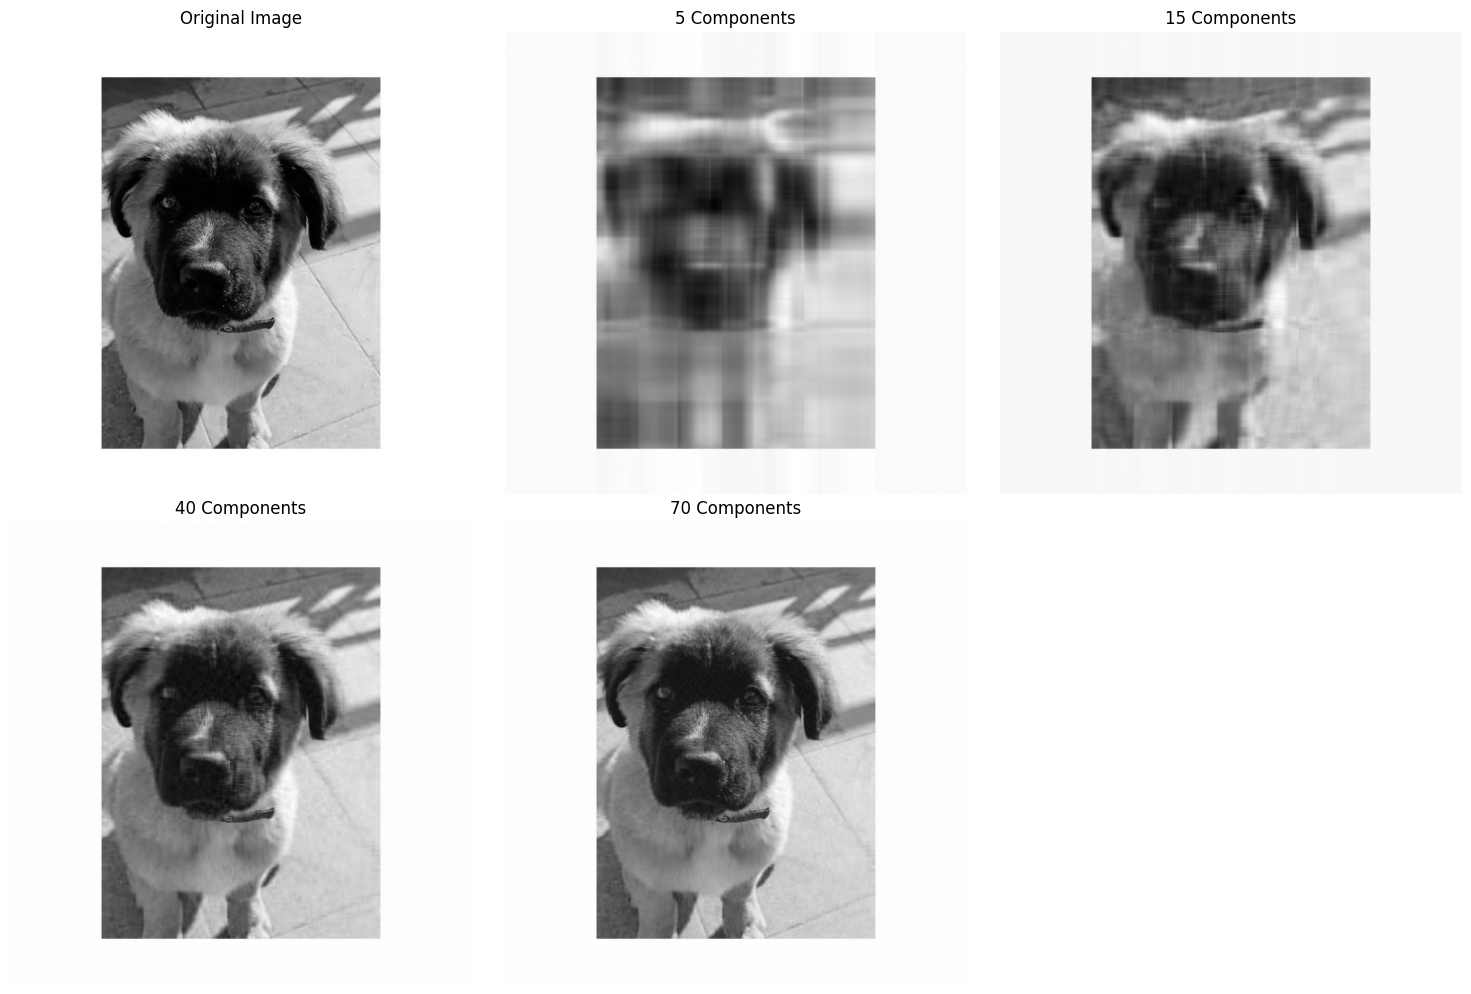

In [8]:
# Choose k principal components
k_values = [5, 15, 40, 70]  # Four different values of k
reconstructed_images = []

for k in k_values:
    # Select top k eigenvectors
    components = eigenvectors [:, :k]

    # Project the data onto the principal components
    compressed_data = np.dot(centered_data, components)

    # Reconstruct the data
    reconstructed_data = np.dot(compressed_data, components.T) + mean
    reconstructed_images.append(reconstructed_data)

# Display the results
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(g_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Reconstructed Images
for i, k in enumerate(k_values):
    plt.subplot(2, 3, i + 2)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.title(f'{k} Components')
    plt.axis('off')

plt.tight_layout()
plt.show()

Evaluating the image, it can be seen that as the k increases, the reconstruction error decreases and the explained variance increases, which is expected because more components capture more variance.